In [1]:
import numpy as np
import copy
import os, sys
import gvar


In [2]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import argparse

sys.path.insert(0,'../')
import xmgrace_parser
import settings
import utils
import tmin_plots
plt.style.use('../spectrum.mplstyle')

In [3]:
tmin_plot_files = { #plot corrs
    # "ROT 0":{
    #     "ROT(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-0_10000T1g-ROT-0T2-25-10_4_0.agr",
    #     "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT0.agr",
    # },
    "ROT 0":{
        "data": "conspiracy/fit_0.agr",
        "ROT(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-0_10000T1g-ROT-0T2-15-10_4_D_0.agr",
        "ROT(ratio 1-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-0_10000T1g-ROT-0T2-15-15R_0_D_0.agr",
        "ROT(geom)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-0_10000T1g-ROT-0T1-15-10_8_D_0.agr",
        "ROT(3-exp) + N(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-0_10000T1g-ROT-0T2-15-10_24_D_0.agr",
    },
    "N(0) (ROT 0)":{
        "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT0-N.agr",
    },
    # "ROT 1":{
    #     "ROT(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-1_10000T1g-ROT-1T2-25-10_4_1.agr",
    #     "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT1.agr",
    # },
    "ROT 1":{
        "data": "conspiracy/fit_1.agr",
        "ROT(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-1_10000T1g-ROT-1T2-15-10_4_D_1.agr",
        "ROT(ratio 1-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-1_10000T1g-ROT-1T2-15-15R_0_D_1.agr",
        "ROT(geom)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-1_10000T1g-ROT-1T1-15-10_8_D_1.agr",
        "ROT(3-exp) + N(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-1_10000T1g-ROT-1T2-15-10_24_D_1.agr",
    },
    "N(1) (ROT 1)":{
        "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT1-N.agr",
    },
    # "ROT 2":{
    #     "ROT(2-exp)": "conspiracy/tmin_fit_isosinglet-S0-P000-T1g-ROT-2_10000T1g-ROT-2T2-25-10_4_2.agr",
    #     "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT2.agr",
    # },
    # "N(1) (ROT 2)":{
    #     "ROT(3-exp) + N(2-exp)": "conspiracy/threedepexp_ROT2-N.agr",
    # },
}

In [4]:
color_key = list(list(tmin_plot_files.values())[0].keys())
choice = {
    "ROT 0": "ROT(3-exp) + N(2-exp)",
    "N(0) (ROT 0)": "ROT(3-exp) + N(2-exp)",
    "ROT 1": "ROT(3-exp) + N(2-exp)",
    "N(1) (ROT 1)": "ROT(3-exp) + N(2-exp)",
    "ROT 2": "ROT(3-exp) + N(2-exp)",
    "N(1) (ROT 2)": "ROT(3-exp) + N(2-exp)",
}
Andre_vals = { 
    0:{"val": -0.00102, "err":0.00019}, #ROT 0
    1:{"val":0.70273, "err":0.00031},  #ROT 0 N
    2:{"val": -0.00290, "err": 0.00028 }, #ROT 1
    3:{"val": 0.71443, "err": 0.00029 }, #ROT 1 N
}
Andre_N_vals = {
}
tmin_min = 2
tmin_max = 16

In [5]:
color_key


['data',
 'ROT(2-exp)',
 'ROT(ratio 1-exp)',
 'ROT(geom)',
 'ROT(3-exp) + N(2-exp)']

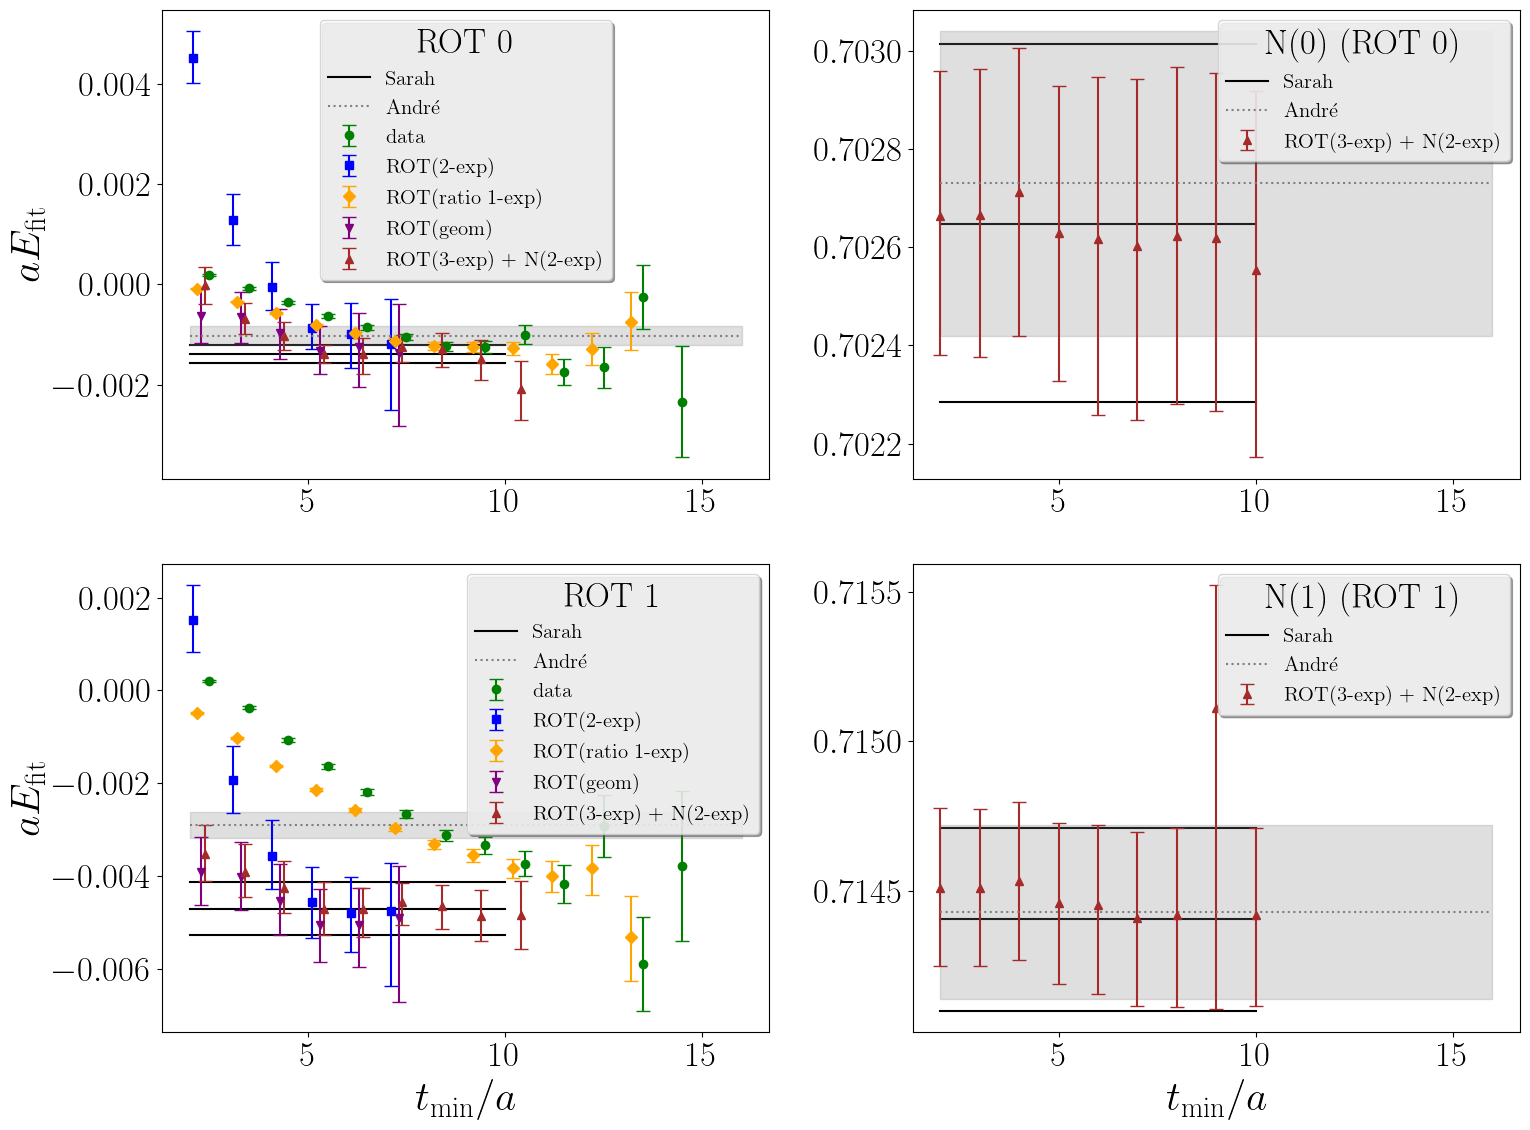

In [6]:
# tmin_plots = {}
nx_plots = 2
ny_plots = int((len(tmin_plot_files)+1)/nx_plots)
figwidth = 16
figheight = 6*ny_plots

f, axes = plt.subplots(ny_plots, nx_plots, figsize=(figwidth, figheight))

if type(axes) != np.ndarray:
    axes = [axes]
else:
    axes = np.reshape(axes,ny_plots*nx_plots)

k = 0; j = 0
for ip, (ax, plot) in enumerate(zip(axes,tmin_plot_files)):
    dd=0.0
    for dataset in tmin_plot_files[plot]:
        # try:
        this_agr_plot = xmgrace_parser.AgrFile(tmin_plot_files[plot][dataset],True)
        this_xydydy = tmin_plots.get_data_by_type(this_agr_plot,tmin_plots.xydydy)
        i = color_key.index(dataset)
        label = True
        for g,s in this_xydydy:
            this_t, this_val, this_err1, this_err2 = this_agr_plot.get_dataset(g,s).get_data()
            # mini = np.where(this_t>=tmin_min)[0][0]
            # maxi = np.where(this_t<=tmin_max)[0][-1]
            if type(this_t) != np.ndarray:
                this_t = np.array([this_t])
                this_val = np.array([this_val])
                this_err1 = abs(np.array([this_err1]))
                this_err2 = abs(np.array([this_err2]))
            else:
                this_err1 = abs(this_err1)
                this_err2 = abs(this_err2)
            # this_t = this_t[mini:maxi]
            # this_val = this_val[mini:maxi]
            # this_err1 = this_err1[mini:maxi]
            # this_err2 = this_err2[mini:maxi]
            if label:
                ax.errorbar(x=this_t+dd, y=this_val, yerr=[this_err2,this_err1], capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5 , label=dataset)
            else:
                ax.errorbar(x=this_t+dd, y=this_val, yerr=[this_err2,this_err1], capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5)
            label = False
        this_xydy = tmin_plots.get_data_by_type(this_agr_plot,tmin_plots.xydy)
        for g,s in this_xydy:
            this_t, this_val, this_err1 = this_agr_plot.get_dataset(g,s).get_data()
            if type(this_t) != np.ndarray:
                this_t = np.array([this_t])
                this_val = np.array([this_val])
                this_err1 = abs(np.array([this_err1]))
            else:
                this_err1 = abs(this_err1)
            mini = np.where(this_t>=tmin_min)[0][0]
            maxi = np.where(this_t<=tmin_max)[0][-1]
            this_t = this_t[mini:maxi]
            this_val = this_val[mini:maxi]
            this_err1 = this_err1[mini:maxi]
            if label:
                ax.errorbar(x=this_t+dd, y=this_val, yerr=this_err1, capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5 , label=dataset)
            else:
                ax.errorbar(x=this_t+dd, y=this_val, yerr=this_err1, capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5)
            label = False
        
        if dataset==choice[plot]:
            this_xy = tmin_plots.get_data_by_type(this_agr_plot,tmin_plots.xy)
            choice_label = False
            for g,s in this_xy:
                this_t, this_val = this_agr_plot.get_dataset(g,s).get_data()
                if not choice_label:
                    ax.plot(this_t, this_val, color = "black", zorder=0,label="Sarah")
                    choice_label=True
                else:
                    ax.plot(this_t, this_val, color = "black", zorder=0)
                    
                    
            

        dd+=0.1

        # except FileNotFoundError as err:
        #     print("Could not find file:", err)
        # except Error as err:
        #     print(err)

    if ip in Andre_vals.keys():
        value = Andre_vals[ip]
        # this_xlim = ax.get_xlim()
        ax.fill_between((tmin_min,tmin_max),value["val"]-value["err"],value["val"]+value["err"], color="gray",zorder=0,alpha=0.25)
        ax.hlines(value["val"],tmin_min,tmin_max, color="gray",label=r"Andr\'e", ls="dotted")

    ax.legend(title=plot,fontsize=15)
    if k%2==0:
        ax.set_ylabel(r"$aE_{\textup{fit}}$")
        j+=1
    k+=1
    if j==ny_plots:
        ax.set_xlabel(r"$t_{\textup{min}}/a$")

plt.tight_layout()
plt.savefig(os.path.join("conspiracy","conspiracy_isosingletNN_T1g_P0.pdf"))

# for item in tmin_plot_files:
    # tmin_plots[item] = xmgrace_parser.AgrFile(tmin_plot_files[item],True)


In [7]:
corr_plot_files = { #plot corrs
    # "ROT 0 C(t)":{
    #     r"Andr\'e": "conspiracy/Andre_level0.csv",
    #     "Sarah 5-10": "conspiracy/eff-energy_isosinglet_S0_T1g_P0_rotated_0-5_10.agr",
    #     "Sarah 5-12": "conspiracy/eff-energy_isosinglet_S0_T1g_P0_rotated_0-5_12.agr",
    # },
    # "ROT 1 C(t)":{
    #     r"Andr\'e": "conspiracy/Andre_level1.csv",
    #     "Sarah 5-10": "conspiracy/eff-energy_isosinglet_S0_T1g_P0_rotated_1-5_10.agr",
    #     "Sarah 5-12": "conspiracy/eff-energy_isosinglet_S0_T1g_P0_rotated_1-5_12.agr",
    # },
    # "ROT 0 R(t)":{
    #     r"Andr\'e": "conspiracy/Andre_rlevel0.csv",
    #     "Sarah 5-10 bins": "conspiracy/fit_0-5_10b.agr",
    #     "Sarah 5-10": "conspiracy/fit_0.agr",
    #     # "Sarah 5-10 2": "conspiracy/fit_0-5_10-2.agr",
    #     "Sarah 5-10 rolling": "conspiracy/fit_0-5_10r.agr",
    #     "Sarah 5-12": "conspiracy/fit_0-5_12.agr",
    #     "Sarah 5-14": "conspiracy/fit_0-5_14.agr",
    # },
    "ROT 1 R(t)":{
        r"Andr\'e": "conspiracy/Andre_rlevel1-2.csv",
        # "Sarah 5-10 bins": "conspiracy/fit_1-5_10b.agr",
        "Sarah 5-10": "conspiracy/fit_1.agr",
        # "Sarah 5-10 2": "conspiracy/fit_1-5_10-2.agr",
        # "Sarah 5-10 rolling": "conspiracy/fit_1-5_10r.agr",
        # "Sarah 5-12": "conspiracy/fit_1-5_12.agr",
        # "Sarah 5-14": "conspiracy/fit_1-5_14.agr",
    },
    # "N0(t)":{
    #     r"Andr\'e": "conspiracy/Andre_N0.csv",
    #     "Sarah": "conspiracy/fit_N(0).agr",
    # },
    # "N1(t)":{
    #     r"Andr\'e": "conspiracy/Andre_N1.csv",
    #     "Sarah": "conspiracy/fit_N(1).agr",
    # },
}

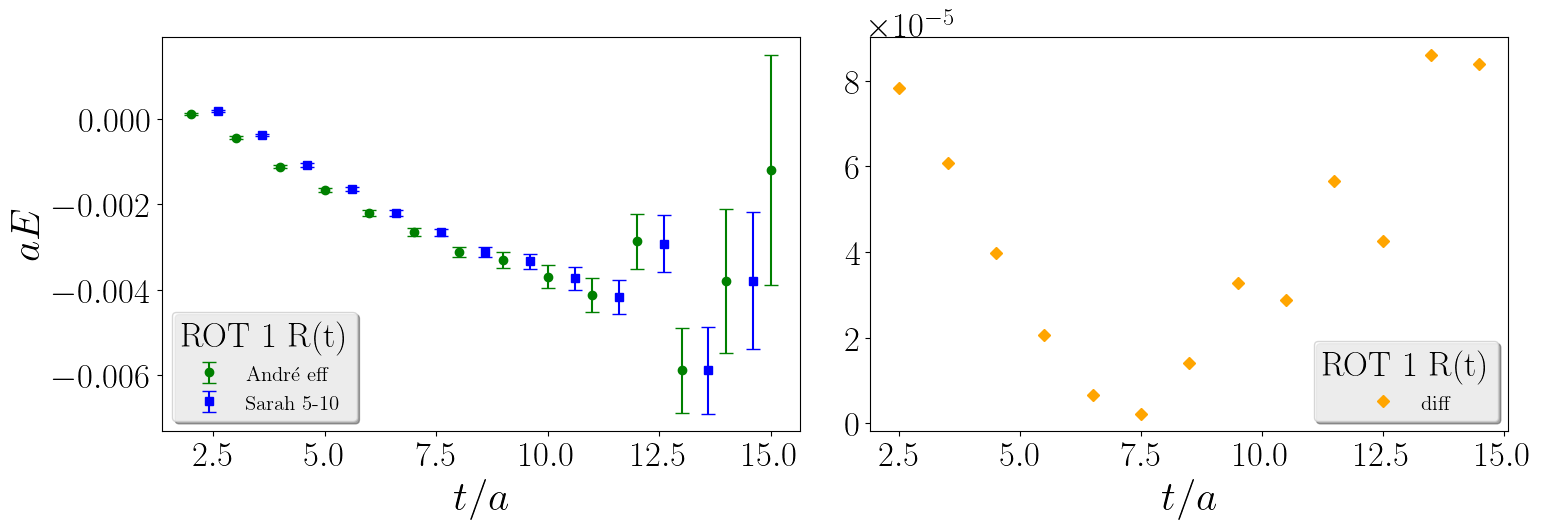

In [9]:
corr_plot_keys = list(corr_plot_files.keys())
i=0
nx_plots = 2
ny_plots = int((len(corr_plot_files)))
figwidth = 16
figheight = 6*ny_plots

f, axes = plt.subplots(ny_plots, nx_plots, figsize=(figwidth, figheight))

if type(axes) != np.ndarray:
    axes = [axes]
else:
    axes = np.reshape(axes,ny_plots*nx_plots)

k = 0; j = 0
for ip, ax in enumerate(axes):
    diff=False
    if ip%2==1:
        diff = True
    plot = corr_plot_keys[int(ip/2)]

    dd=0.0
    i=0
    for dataset in corr_plot_files[plot]:
        # try:
        if corr_plot_files[plot][dataset].endswith(".agr"):
            this_agr_plot = xmgrace_parser.AgrFile(corr_plot_files[plot][dataset],True)
            this_xydy = tmin_plots.get_data_by_type(this_agr_plot,tmin_plots.xydy)
            label=True
            for g,s in this_xydy:
                this_t, this_val, this_err1 = this_agr_plot.get_dataset(g,s).get_data()
                if type(this_t) != np.ndarray:
                    this_t = np.array([this_t])
                    this_val = np.array([this_val])
                    this_err1 = abs(np.array([this_err1]))
                else:
                    this_err1 = abs(this_err1)
                mini = np.where(this_t>=tmin_min)[0][0]
                maxi = np.where(this_t<=tmin_max)[0][-1]
                this_t = this_t[mini:maxi]
                this_val = this_val[mini:maxi]
                this_err1 = this_err1[mini:maxi]
                df = pd.DataFrame({"tsep":this_t,"vals":this_val,"errs":this_err1})
                df.to_csv(f'conspiracy/{plot.replace(" ","_")}.csv')
                if not diff:
                    if label:
                        ax.errorbar(x=this_t+dd, y=this_val, yerr=this_err1, capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5 , label=dataset)
                    else:
                        ax.errorbar(x=this_t+dd, y=this_val, yerr=this_err1, capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5)
                    label = False
        else:
            this_data = pd.read_csv(corr_plot_files[plot][dataset], sep=" ", header=None)
            this_data[3] = np.array([gvar.gvar(item).mean for item in this_data[1]])
            this_data[4] = np.array([gvar.gvar(item).sdev for item in this_data[1]])
            mini = np.where(this_data[0]>=tmin_min)[0][0]
            maxi = np.where(this_data[0]<=tmin_max)[0][-1]
            t, E = utils.effenergy(this_data[0][mini:maxi],np.array(this_data[3][mini:maxi]))
            if not diff and 2 not in this_data.keys():
                ax.plot(t+dd,E, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, label=dataset)
            elif not diff and 2 in this_data.keys():
                this_data[5] = np.array([gvar.gvar(item).mean for item in this_data[2]])
                this_data[6] = np.array([gvar.gvar(item).sdev for item in this_data[2]])
                ax.errorbar(x=this_data[0][mini:maxi],y=this_data[5][mini:maxi], yerr=this_data[6][mini:maxi],
                            color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, label=dataset+" eff", capsize=5, elinewidth=1.5) 
            # print(val.sdev)
                    
                    
        i+=1
        dd+=0.1

    
    if diff:
        ax.plot(t, np.abs(this_val-np.array(E)), color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, label="diff" )


    ax.legend(title=plot,fontsize=15)
    if k%2==0:
        ax.set_ylabel(r"$aE$")
        j+=1
    k+=1
    if j==ny_plots:
        ax.set_xlabel(r"$t/a$")

plt.tight_layout()
plt.show()

In [ ]:
list(corr_plot_files.keys())

['ROT 0 R(t)', 'ROT 1 R(t)']